In [73]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [74]:
!pip install openpyxl

In [75]:
df = pd.read_excel("data/food_data.xlsx")

In [76]:
df.head()

,description,sub_category,main_category,category,energy (kJ),carbohydrate_G,vitamin_A_UG,calcium_MG,potassium_MG,zinc_MG,...,folate_total_UG,vitamin B_12_UG,thiamin_MG,riboflavin_MG,cholesterol_MG,Niacin_MG,vitamin_B_6_MG,selenium_UG,vitamin D _UG,choline_total_MG
0,"Abiyuch, raw",Fruit,Veg,Fruits and Fruit Juices,290.0,17.60,5.0,8.0,304.0,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Acerola juice, raw",Juice,Veg,Fruits and Fruit Juices,96.0,4.80,25.0,10.0,97.0,0.10,...,14.0,0.0,0.020,0.060,0.0,0.400,0.004,0.1,NaN,NaN
2,"Acerola, (west indian cherry), raw",Fruit,Veg,Fruits and Fruit Juices,134.0,7.69,38.0,12.0,146.0,0.10,...,14.0,0.0,0.020,0.060,0.0,0.400,0.009,0.6,NaN,NaN
3,"Alfalfa seeds, sprouted, raw",Vegetable,Veg,Vegetables and Vegetable Products,96.0,2.10,8.0,32.0,79.0,0.92,...,36.0,0.0,0.076,0.126,0.0,0.481,0.034,0.6,0.0,14.4
4,"Amaranth leaves, raw",Vegetable,Veg,Vegetables and Vegetable Products,97.0,4.02,146.0,215.0,611.0,0.90,...,85.0,0.0,0.027,0.158,0.0,0.658,0.192,0.9,0.0,NaN


In [77]:
df.main_category.unique()

array(['Veg', 'Non-veg', 'Non Alcoholic'], dtype=object)

In [78]:
df.rename(columns={'vitamin_K_ UG': 'vitamin_K_UG', 'vitamin D _UG' : 'vitamin_D_UG', 'vitamin B_12_UG' : 'vitamin_B_12_UG'}, inplace=True)

In [79]:
df.shape

(1166, 36)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   description                          1166 non-null   object 
 1   sub_category                         1166 non-null   object 
 2   main_category                        1166 non-null   object 
 3   category                             1166 non-null   object 
 4   energy (kJ)                          1048 non-null   float64
 5   carbohydrate_G                       1162 non-null   float64
 6   vitamin_A_UG                         994 non-null    float64
 7   calcium_MG                           1164 non-null   float64
 8   potassium_MG                         1150 non-null   float64
 9   zinc_MG                              1132 non-null   float64
 10  water_G                              1164 non-null   float64
 11  total_lipid_fat_G             

In [81]:
df.isnull().sum()

description                              0
sub_category                             0
main_category                            0
category                                 0
energy (kJ)                            118
carbohydrate_G                           4
vitamin_A_UG                           172
calcium_MG                               2
potassium_MG                            16
zinc_MG                                 34
water_G                                  2
total_lipid_fat_G                        0
protein_G                                2
fatty_acids_total_saturated_G          162
vitamin_C_MG                           125
fiber_total_dietary_G                  140
iron_MG                                  4
magnesium_MG                            26
phosphorus_MG                           15
sodium_MG                                6
copper_MG                               37
total_sugars_G                         463
fatty_acids_total_monounsaturated_G    176
vitamin_K_U

In [82]:
df.columns

Index(['description', 'sub_category', 'main_category', 'category',
       'energy (kJ)', 'carbohydrate_G', 'vitamin_A_UG', 'calcium_MG',
       'potassium_MG', 'zinc_MG', 'water_G', 'total_lipid_fat_G', 'protein_G',
       'fatty_acids_total_saturated_G', 'vitamin_C_MG',
       'fiber_total_dietary_G', 'iron_MG', 'magnesium_MG', 'phosphorus_MG',
       'sodium_MG', 'copper_MG', 'total_sugars_G',
       'fatty_acids_total_monounsaturated_G', 'vitamin_K_UG', 'vitamin_E_MG',
       'fatty_acids_total_polyunsaturated_G', 'folate_total_UG',
       'vitamin_B_12_UG', 'thiamin_MG', 'riboflavin_MG', 'cholesterol_MG',
       'Niacin_MG', 'vitamin_B_6_MG', 'selenium_UG', 'vitamin_D_UG',
       'choline_total_MG'],
      dtype='object')

### Preprocessing

In [83]:
df.fillna(0, inplace = True)

In [84]:

in_mg = ['calcium_MG', 'potassium_MG', 'zinc_MG', 'vitamin_C_MG', 'iron_MG', 'magnesium_MG', 'phosphorus_MG',
          'sodium_MG', 'copper_MG', 'vitamin_E_MG', 'thiamin_MG', 'riboflavin_MG', 'cholesterol_MG', 'Niacin_MG', 
          'vitamin_B_6_MG', 'choline_total_MG']

in_grams = ['carbohydrate_G', 'water_G', 'total_lipid_fat_G', 'protein_G', 'fatty_acids_total_saturated_G', 
            'fiber_total_dietary_G','total_sugars_G', 'fatty_acids_total_monounsaturated_G', 
            'fatty_acids_total_polyunsaturated_G' ]

in_ug = ['vitamin_A_UG', 'vitamin_K_UG', 'folate_total_UG', 'vitamin_B_12_UG', 'selenium_UG', 'vitamin_D_UG' ]

others = ['description', 'sub_category', 'main_category', 'category', 'energy (kJ)']

# Convert grams to milligrams (g → mg)
df[in_grams] = df[in_grams] * 1000

# Convert micrograms to milligrams (µg → mg)
df[in_ug] = df[in_ug] / 1000




In [85]:

df.columns = df.columns.str.replace(r'_(UG|MG|G)$', '', regex=True)

In [86]:
df.columns

Index(['description', 'sub_category', 'main_category', 'category',
       'energy (kJ)', 'carbohydrate', 'vitamin_A', 'calcium', 'potassium',
       'zinc', 'water', 'total_lipid_fat', 'protein',
       'fatty_acids_total_saturated', 'vitamin_C', 'fiber_total_dietary',
       'iron', 'magnesium', 'phosphorus', 'sodium', 'copper', 'total_sugars',
       'fatty_acids_total_monounsaturated', 'vitamin_K', 'vitamin_E',
       'fatty_acids_total_polyunsaturated', 'folate_total', 'vitamin_B_12',
       'thiamin', 'riboflavin', 'cholesterol', 'Niacin', 'vitamin_B_6',
       'selenium', 'vitamin_D', 'choline_total'],
      dtype='object')

In [87]:
df['iron'].max()

41.9

In [88]:
# Select relevant columns (nutrients for modeling)
nutrients = ['calcium', 'potassium', 'zinc', 'vitamin_C', 'iron', 'magnesium', 'phosphorus','sodium', 'copper',
              'vitamin_E', 'thiamin', 'riboflavin', 'cholesterol', 'Niacin', 'vitamin_B_6', 'choline_total',
              'vitamin_A', 'vitamin_K', 'folate_total', 'vitamin_B_12', 'selenium', 'vitamin_D' ]

# Normalize the nutrient values for ML
scaler = MinMaxScaler()
df[nutrients] = scaler.fit_transform(df[nutrients])

# Save the processed data
df.to_csv("data/processed_food_data.csv", index=False)
print("✅ Data preprocessing complete! File saved as 'processed_food_data.csv'.")


✅ Data preprocessing complete! File saved as 'processed_food_data.csv'.


# Filtering data based on one deficiency.

In [89]:
# Load processed dataset
df = pd.read_csv("data/processed_food_data.csv")

# Define features (nutrient values)
nutrients = ['calcium', 'potassium', 'zinc', 'vitamin_C', 'iron', 'magnesium', 'phosphorus','sodium', 'copper',
              'vitamin_E', 'thiamin', 'riboflavin', 'cholesterol', 'Niacin', 'vitamin_B_6', 'choline_total',
              'vitamin_A', 'vitamin_K', 'folate_total', 'vitamin_B_12', 'selenium', 'vitamin_D' ]
X = df[nutrients]

# Train a KNN model
knn = NearestNeighbors(n_neighbors=10, metric='euclidean')
knn.fit(X)

def recommend_food(deficiency):
    """Recommend food items based on a user's nutrient deficiency."""
    if deficiency not in nutrients:
        return "Invalid deficiency. Choose from: " + ", ".join(nutrients)

    # Create a query vector: 1 for the deficient nutrient, 0 for others
    deficiency_idx = nutrients.index(deficiency)
    sample = np.zeros(len(nutrients))
    sample[deficiency_idx] = 1  # Targeting the deficient nutrient

    # Find similar foods
    distances, indices = knn.kneighbors([sample])
    recommendations = df.iloc[indices[0]][['description', deficiency]]

    return recommendations.to_dict(orient="records")

# Test the model
print("✅ Model trained. Testing recommendations...\n")

print("🥗 Vitamin C Deficiency:")
print(recommend_food("vitamin_C"))

print("\n🥩 Iron Deficiency:")
print(recommend_food("iron"))


✅ Model trained. Testing recommendations...

🥗 Vitamin C Deficiency:
[{'description': 'Acerola, (west indian cherry), raw', 'vitamin_C': 1.0}, {'description': 'Acerola juice, raw', 'vitamin_C': 0.9523809523809524}, {'description': 'Beverages, tea, green, instant, decaffeinated, lemon, unsweetened, fortified with vitamin C', 'vitamin_C': 0.7976190476190477}, {'description': 'Guavas, common, raw', 'vitamin_C': 0.1357142857142857}, {'description': 'Peppers, hot chili, green, raw', 'vitamin_C': 0.144047619047619}, {'description': 'Peppers, sweet, yellow, raw', 'vitamin_C': 0.1095238095238095}, {'description': 'Mango, Ataulfo, peeled, raw', 'vitamin_C': 0.1}, {'description': 'Currants, european black, raw', 'vitamin_C': 0.1077380952380952}, {'description': 'Kiwifruit, ZESPRI SunGold, raw', 'vitamin_C': 0.0958333333333333}, {'description': 'Peppers, bell, orange, raw', 'vitamin_C': 0.094047619047619}]

🥩 Iron Deficiency:
[{'description': 'Lamb, variety meats and by-products, spleen, raw', 'i

/home/nupur/cgn-dp-24-1/culinary_compass/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/nupur/cgn-dp-24-1/culinary_compass/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


# Filtering data based on multiple deficiencies

In [90]:

# Load processed dataset
df = pd.read_csv("data/processed_food_data.csv")

# Define features (nutrient values)
nutrients = ['calcium', 'potassium', 'zinc', 'vitamin_C', 'iron', 'magnesium', 'phosphorus', 'sodium', 'copper',
             'vitamin_E', 'thiamin', 'riboflavin', 'cholesterol', 'Niacin', 'vitamin_B_6', 'choline_total',
             'vitamin_A', 'vitamin_K', 'folate_total', 'vitamin_B_12', 'selenium', 'vitamin_D']
X = df[nutrients]

# Train a KNN model
knn = NearestNeighbors(n_neighbors=40, metric='euclidean')
knn.fit(X)

def recommend_food(deficiencies):
    """Recommend food items based on a user's nutrient deficiencies."""
    if not isinstance(deficiencies, list):
        return "Invalid input. Provide a list of deficiencies."
    
    invalid_nutrients = [d for d in deficiencies if d not in nutrients]
    if invalid_nutrients:
        return f"Invalid deficiencies: {', '.join(invalid_nutrients)}. Choose from: {', '.join(nutrients)}"

    # Create a query vector: 1 for deficient nutrients, 0 for others
    sample = np.zeros(len(nutrients))
    for deficiency in deficiencies:
        sample[nutrients.index(deficiency)] = 1  # Targeting deficient nutrients

    # Find similar foods
    distances, indices = knn.kneighbors([sample])
    recommendations = df.iloc[indices[0]][['description'] + deficiencies]

    return "\n".join([str(item) for item in recommendations.to_dict(orient="records")])

# Test the model
print("✅ Model trained. Testing recommendations...\n")

print("🥗 Vitamin C and Iron Deficiency:")
print(recommend_food(["vitamin_C", "iron"]))

print("\n🥩 Calcium and Magnesium Deficiency:")
print(recommend_food(["calcium", "magnesium"]))


✅ Model trained. Testing recommendations...

🥗 Vitamin C and Iron Deficiency:
{'description': 'Acerola juice, raw', 'vitamin_C': 0.9523809523809524, 'iron': 0.0119331742243436}
{'description': 'Acerola, (west indian cherry), raw', 'vitamin_C': 1.0, 'iron': 0.0047732696897374}
{'description': 'Beverages, tea, green, instant, decaffeinated, lemon, unsweetened, fortified with vitamin C', 'vitamin_C': 0.7976190476190477, 'iron': 0.0050119331742243}
{'description': 'Lamb, variety meats and by-products, spleen, raw', 'vitamin_C': 0.0136904761904761, 'iron': 1.0}
{'description': 'Pork, fresh, variety meats and by-products, spleen, raw', 'vitamin_C': 0.0169642857142857, 'iron': 0.5322195704057279}
{'description': 'Pork, fresh, variety meats and by-products, lungs, raw', 'vitamin_C': 0.0073214285714285, 'iron': 0.4510739856801908}
{'description': 'Mushrooms, morel, raw', 'vitamin_C': 0.0, 'iron': 0.2911694510739857}
{'description': 'Lemon grass (citronella), raw', 'vitamin_C': 0.001547619047619

/home/nupur/cgn-dp-24-1/culinary_compass/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/nupur/cgn-dp-24-1/culinary_compass/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


###  Filtering food based on category veg/Non - veg

In [91]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# Assuming df is already loaded with the dataset
df = pd.read_csv("data/processed_food_data.csv")

# Define the nutrients list within the function
def recommend_food(deficiencies, category=None):
    """Recommend food items based on a user's nutrient deficiencies, with optional category filtering."""
    
    # Define nutrients inside the function
    nutrients = ['calcium', 'potassium', 'zinc', 'vitamin_C', 'iron', 'magnesium', 'phosphorus', 'sodium', 'copper',
                 'vitamin_E', 'thiamin', 'riboflavin', 'cholesterol', 'Niacin', 'vitamin_B_6', 'choline_total',
                 'vitamin_A', 'vitamin_K', 'folate_total', 'vitamin_B_12', 'selenium', 'vitamin_D']
    
    if not isinstance(deficiencies, list):
        return "Invalid input. Provide a list of deficiencies."
    
    # Check for invalid deficiencies
    invalid_nutrients = [d for d in deficiencies if d not in nutrients]
    if invalid_nutrients:
        return f"Invalid deficiencies: {', '.join(invalid_nutrients)}. Choose from: {', '.join(nutrients)}"

    # Filter by category (if specified)
    if category == 'Veg':
        # Filter the dataframe based on the main category (e.g., 'Veg')
        df_filtered = df[df['main_category'] == category]
        if df_filtered.empty:
            return f"No data found for the category: {category}."
    else:
        df_filtered = df  # If no category is selected, use the whole dataframe

    # Create a query vector: 1 for deficient nutrients, 0 for others
    sample = np.zeros(len(nutrients))
    for deficiency in deficiencies:
        sample[nutrients.index(deficiency)] = 1  # Targeting deficient nutrients

    # Train the KNN model on the filtered data (to ensure it's category-specific)
    X_filtered = df_filtered[nutrients]
    knn = NearestNeighbors(n_neighbors=40, metric='euclidean')
    knn.fit(X_filtered)

    # Find similar foods
    distances, indices = knn.kneighbors([sample])
    recommendations = df_filtered.iloc[indices[0]][['description'] + deficiencies]

    # Format recommendations as a list of strings
    recommendation_list = [f"\nRecommendations for {' and '.join(deficiencies)} Deficiency:"]
    for i, row in recommendations.iterrows():
        recommendation_list.append(f"Food: {row['description']}, {', '.join([f'{d.capitalize()}: {row[d]} mg' for d in deficiencies])}")

    return "\n".join(recommendation_list)

# Test the model with multiple deficiencies and category filtering
print("✅ Model trained. Testing recommendations...\n")

print("🥗 Vitamin C and Iron Deficiency (Veg Only):")
print(recommend_food(["vitamin_C", "iron"], category="Non-veg"))

print("\n🥩 Calcium and Magnesium Deficiency (Veg Only):")
print(recommend_food(["calcium", "magnesium"], category="Non-veg"))


✅ Model trained. Testing recommendations...

🥗 Vitamin C and Iron Deficiency (Veg Only):

Recommendations for vitamin_C and iron Deficiency:
Food: Acerola juice, raw, Vitamin_c: 0.9523809523809524 mg, Iron: 0.0119331742243436 mg
Food: Acerola, (west indian cherry), raw, Vitamin_c: 1.0 mg, Iron: 0.0047732696897374 mg
Food: Beverages, tea, green, instant, decaffeinated, lemon, unsweetened, fortified with vitamin C, Vitamin_c: 0.7976190476190477 mg, Iron: 0.0050119331742243 mg
Food: Lamb, variety meats and by-products, spleen, raw, Vitamin_c: 0.0136904761904761 mg, Iron: 1.0 mg
Food: Pork, fresh, variety meats and by-products, spleen, raw, Vitamin_c: 0.0169642857142857 mg, Iron: 0.5322195704057279 mg
Food: Pork, fresh, variety meats and by-products, lungs, raw, Vitamin_c: 0.0073214285714285 mg, Iron: 0.4510739856801908 mg
Food: Mushrooms, morel, raw, Vitamin_c: 0.0 mg, Iron: 0.2911694510739857 mg
Food: Lemon grass (citronella), raw, Vitamin_c: 0.001547619047619 mg, Iron: 0.194988066825775

/home/nupur/cgn-dp-24-1/culinary_compass/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/nupur/cgn-dp-24-1/culinary_compass/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [92]:
df.main_category.unique()

array(['Veg', 'Non-veg', 'Non Alcoholic'], dtype=object)

In [93]:
%matplotlib inline


### Recommendation using metric =cosine and algorithm brute

✅ Model trained. Testing recommendations...

🥗 Vitamin C and Iron Deficiency:
[[0.99048399 0.99687444 1.01585837 1.08855273 1.16243895 1.17481711
  1.26090667 1.30594915 1.31314364 1.32203128 1.32760533 1.32846903
  1.32981009 1.33654496 1.33922672 1.33967684 1.34561125 1.34613904
  1.34758642 1.35401428]]
Unique distances: [0.99048399 0.99687444 1.01585837 1.08855273 1.16243895 1.17481711
 1.26090667 1.30594915 1.31314364 1.32203128 1.32760533 1.32846903
 1.32981009 1.33654496 1.33922672 1.33967684 1.34561125 1.34613904
 1.34758642 1.35401428]


/home/nupur/cgn-dp-24-1/culinary_compass/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/nupur/cgn-dp-24-1/culinary_compass/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


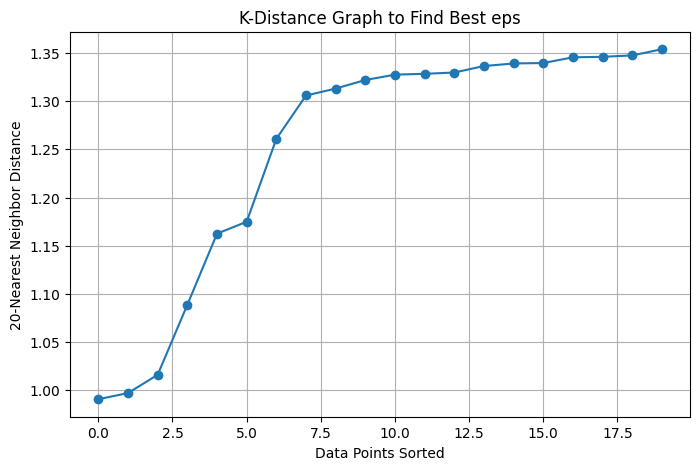

In [103]:

# Load processed dataset
df = pd.read_csv("data/processed_food_data.csv")

# Define features (nutrient values)
nutrients = ['calcium', 'potassium', 'zinc', 'vitamin_C', 'iron', 'magnesium', 'phosphorus', 'sodium', 'copper',
             'vitamin_E', 'thiamin', 'riboflavin', 'cholesterol', 'Niacin', 'vitamin_B_6', 'choline_total',
             'vitamin_A', 'vitamin_K', 'folate_total', 'vitamin_B_12', 'selenium', 'vitamin_D']
X = df[nutrients]

# Train a KNN model
knn = NearestNeighbors(n_neighbors=20, metric='euclidean')
knn.fit(X)

def recommend_food(deficiencies):
    """Recommend food items based on a user's nutrient deficiencies."""
    if not isinstance(deficiencies, list):
        return "Invalid input. Provide a list of deficiencies."
    
    invalid_nutrients = [d for d in deficiencies if d not in nutrients]
    if invalid_nutrients:
        return f"Invalid deficiencies: {', '.join(invalid_nutrients)}. Choose from: {', '.join(nutrients)}"

    # Create a query vector: 1 for deficient nutrients, 0 for others
    sample = np.zeros(len(nutrients))
    for deficiency in deficiencies:
        sample[nutrients.index(deficiency)] = 1  # Targeting deficient nutrients

    # Find similar foods
    distances, indices = knn.kneighbors([sample])
    recommendations = df.iloc[indices[0]][['description'] + deficiencies]
    
    
    

    #return "\n".join([str(item) for item in recommendations.to_dict(orient="records")])
    return distances

# Test the model
print("✅ Model trained. Testing recommendations...\n")

print("🥗 Vitamin C and Iron Deficiency:")
print(recommend_food(["vitamin_C", "iron"]))
distances=recommend_food(["vitamin_C", "iron"])
k=20
if distances is not None and len(distances) > 0:
    distance = np.sort(distances.flatten())  # Ensure it's 1D
    print("Unique distances:", np.unique(distance))

    plt.figure(figsize=(8,5))  
    plt.plot(range(len(distance)), distance, marker='o', linestyle='-')
    plt.xlabel("Data Points Sorted")
    plt.ylabel(f"{k}-Nearest Neighbor Distance")
    plt.title("K-Distance Graph to Find Best eps")
    plt.grid(True)  
    plt.show()
else:
    print("⚠️ No distances to plot. Check KNN neighbor search.")
    



#print("\n🥩 Calcium and Magnesium Deficiency:")
#print(recommend_food(["calcium", "magnesium"]))


## Using DBscan for Recommendation

In [95]:
from sklearn.cluster import DBSCAN

In [109]:

# Load processed dataset
df = pd.read_csv("data/processed_food_data.csv")

# Define features (nutrient values)
nutrients = ['calcium', 'potassium', 'zinc', 'vitamin_C', 'iron', 'magnesium', 'phosphorus', 'sodium', 'copper',
             'vitamin_E', 'thiamin', 'riboflavin', 'cholesterol', 'Niacin', 'vitamin_B_6', 'choline_total',
             'vitamin_A', 'vitamin_K', 'folate_total', 'vitamin_B_12', 'selenium', 'vitamin_D']
X = df[nutrients]

# Train a DBSCAN model
dbscan= DBSCAN(eps=1.5, min_samples=10)
#deficiencies = input("Enter the nutrients you want to filter by (comma separated, e.g., 'Iron (mg), Protein (g)'): ").split(", ")
    

def recommend_food2(deficiencies):
    X_selected=df[deficiencies]
    

    # Find similar foods
    

    #subset_df = df[['description'] + deficiencies]

    clusters= dbscan.fit_predict(X_selected)

    recommendations = df[['description'] + deficiencies].copy()
    recommendations["cluster"] = clusters


    return recommendations

# Test the model
print("✅ Model trained. Testing recommendations...\n")
df_ds=recommend_food2(["vitamin_C", "iron"])
print(recommend_food2(["vitamin_C", "iron"]))



✅ Model trained. Testing recommendations...

                                            description  vitamin_C      iron   
0                                          Abiyuch, raw   0.032202  0.038425  \
1                                    Acerola juice, raw   0.952381  0.011933   
2                    Acerola, (west indian cherry), raw   1.000000  0.004773   
3                          Alfalfa seeds, sprouted, raw   0.004881  0.022912   
4                                  Amaranth leaves, raw   0.025774  0.055370   
...                                                 ...        ...       ...   
1161        Beverages, tea, instant, lemon, unsweetened   0.000000  0.017900   
1162  Beverages, tea, instant, lemon, with added asc...   0.059524  0.003819   
1163       Beverages, tea, instant, unsweetened, powder   0.000000  0.053938   
1164  Beverages, tea, instant, unsweetened, prepared...   0.000000  0.000239   
1165        Beverages, tea, ready-to-drink, lemon, diet   0.000000  0.00000

In [97]:
df.head(5)

,description,sub_category,main_category,category,energy (kJ),carbohydrate,vitamin_A,calcium,potassium,zinc,...,folate_total,vitamin_B_12,thiamin,riboflavin,cholesterol,Niacin,vitamin_B_6,selenium,vitamin_D,choline_total
0,"Abiyuch, raw",Fruit,Veg,Fruits and Fruit Juices,290.0,17600.0,0.000417,0.005333,0.050331,0.007888,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,"Acerola juice, raw",Juice,Veg,Fruits and Fruit Juices,96.0,4800.0,0.002083,0.006667,0.016060,0.002545,...,0.018970,0.0,0.015625,0.016529,0.0,0.016260,0.002353,0.000357,0.0,0.000000
2,"Acerola, (west indian cherry), raw",Fruit,Veg,Fruits and Fruit Juices,134.0,7690.0,0.003167,0.008000,0.024172,0.002545,...,0.018970,0.0,0.015625,0.016529,0.0,0.016260,0.005294,0.002143,0.0,0.000000
3,"Alfalfa seeds, sprouted, raw",Vegetable,Veg,Vegetables and Vegetable Products,96.0,2100.0,0.000667,0.021333,0.013079,0.023410,...,0.048780,0.0,0.059375,0.034711,0.0,0.019553,0.020000,0.002143,0.0,0.017561
4,"Amaranth leaves, raw",Vegetable,Veg,Vegetables and Vegetable Products,97.0,4020.0,0.012167,0.143333,0.101159,0.022901,...,0.115176,0.0,0.021094,0.043526,0.0,0.026748,0.112941,0.003214,0.0,0.000000


In [98]:
df['vitamin_C']

0       0.032202
1       0.952381
2       1.000000
3       0.004881
4       0.025774
          ...   
1161    0.000000
1162    0.059524
1163    0.000000
1164    0.000000
1165    0.000000
Name: vitamin_C, Length: 1166, dtype: float64

In [110]:
from sklearn.ensemble import RandomForestClassifier